#   Question 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as slg
import statsmodels.api as sm

In [2]:
corolla = pd.read_csv("ToyotaCorolla.csv", encoding= "unicode_escape", usecols=[2,3,6,8,12,13,15,16,17])
corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [3]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [4]:
corolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


###  Correlation matrix 

In [5]:
corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


###  Exploratory data analysis 

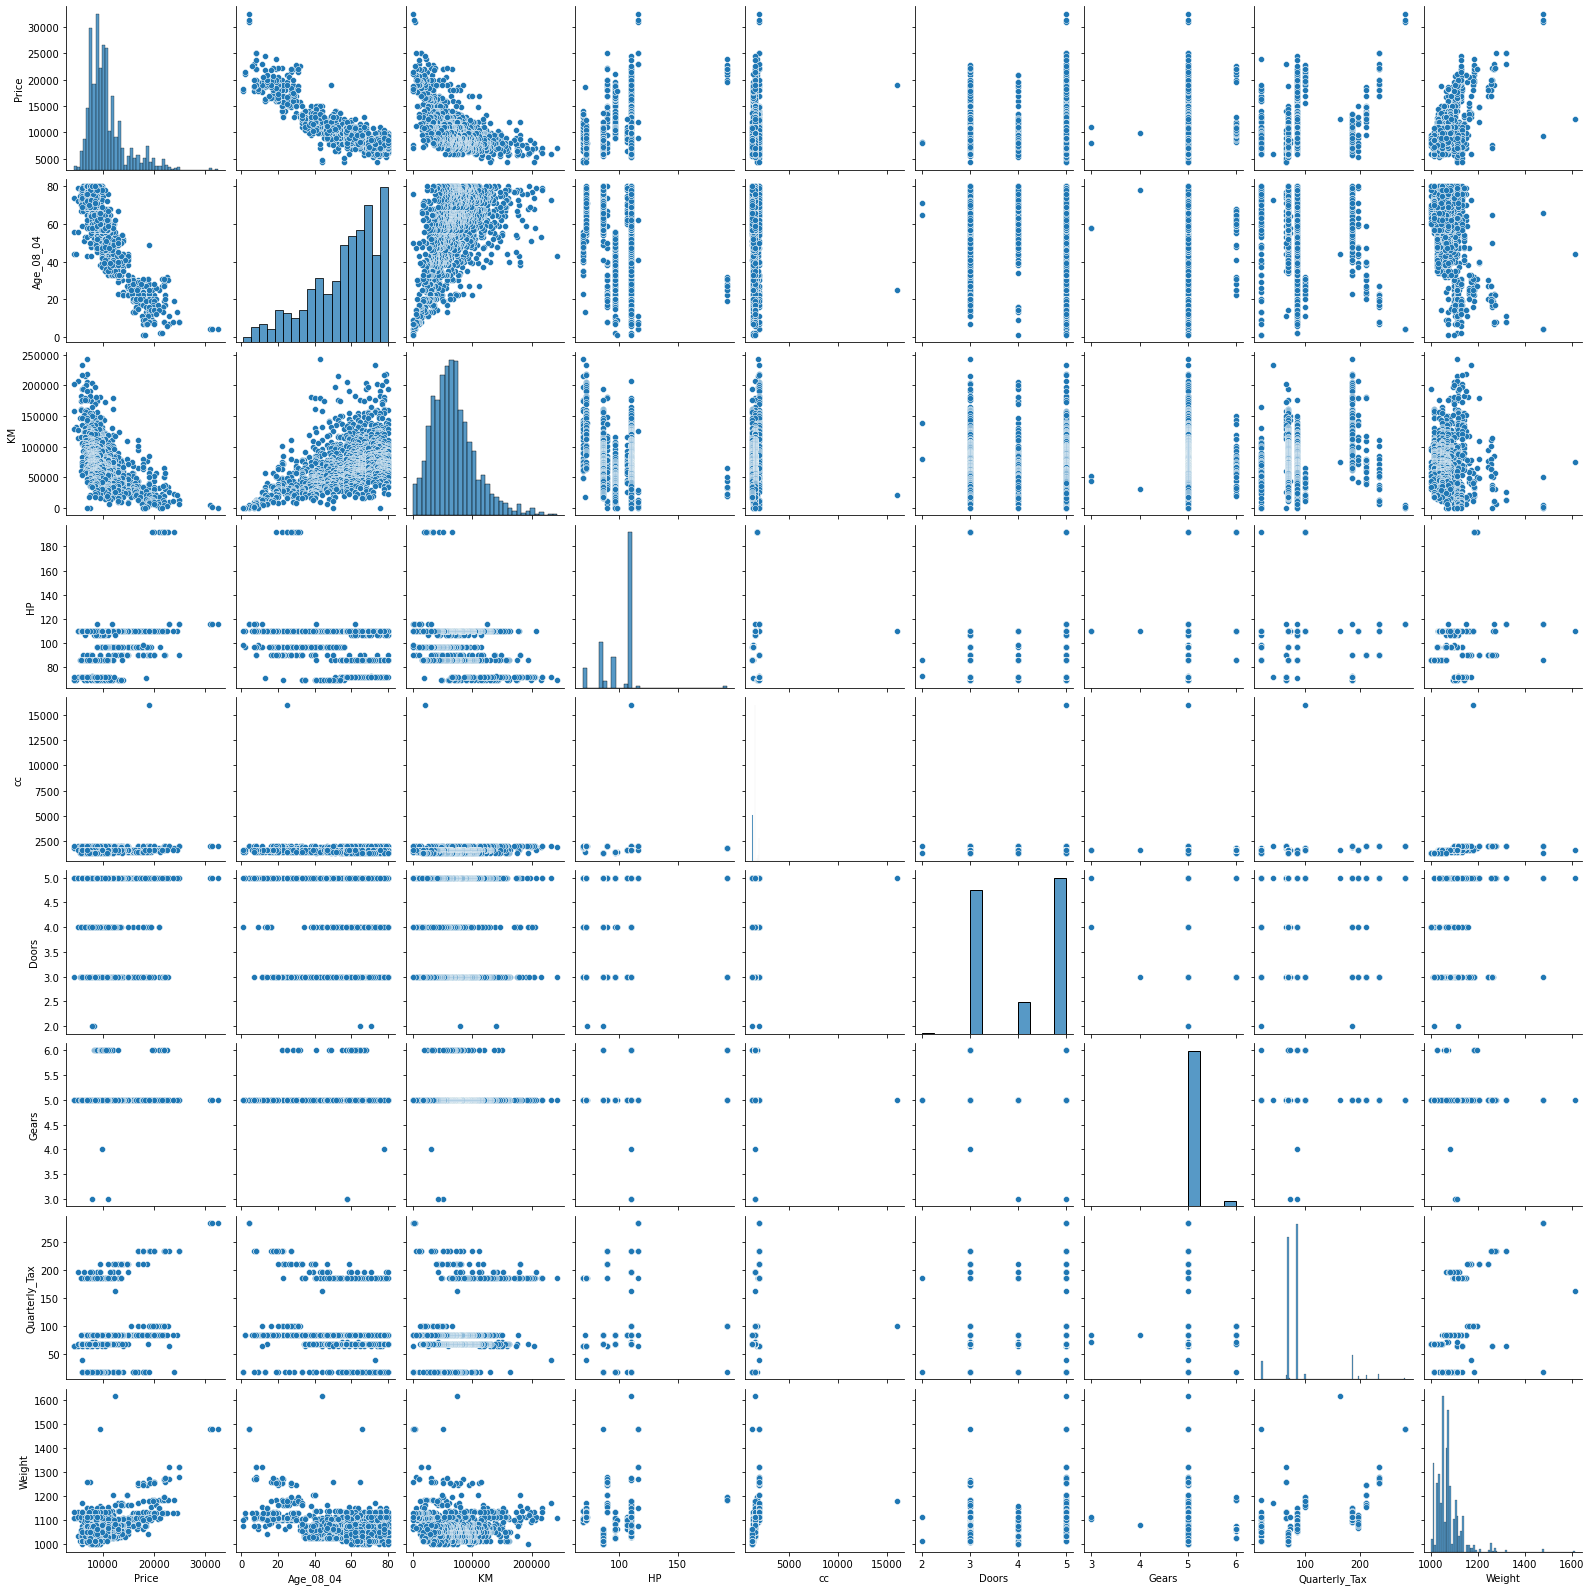

In [6]:
sns.pairplot(corolla)

# Building a multiple linear regression model

In [7]:
model_mlr = slg.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight", data=corolla).fit()

In [8]:
rsq_mlr = model_mlr.rsquared
rsqadj_mlr = model_mlr.rsquared_adj
aic_mlr = model_mlr.aic

In [9]:
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:14:52   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###   In the above model pvalue for cc and Doors are greater than 0.05 so both values are insignificant 

##  Model Validation Technique 

###   Calculating VIF values 

In [10]:
rsq_age = slg.ols('Age_08_04 ~ KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=corolla).fit().rsquared  
vif_age = 1/(1-rsq_age) 

rsq_km = slg.ols('KM ~ Age_08_04 + HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=corolla).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_hp = slg.ols('HP ~ Age_08_04 + KM + cc + Doors + Gears + Quarterly_Tax + Weight',data=corolla).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_cc = slg.ols('cc ~ Age_08_04 + KM + HP + Doors + Gears + Quarterly_Tax + Weight',data=corolla).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_doors = slg.ols('Doors ~ Age_08_04 + KM + HP + cc + Gears + Quarterly_Tax + Weight',data=corolla).fit().rsquared  
vif_doors = 1/(1-rsq_doors)

rsq_gears = slg.ols('Gears ~ Age_08_04 + KM + HP + cc + Doors + Quarterly_Tax + Weight',data=corolla).fit().rsquared  
vif_gears = 1/(1-rsq_gears)

rsq_qt = slg.ols('Quarterly_Tax ~ Age_08_04 + KM + HP + cc + Doors + Gears + Weight',data=corolla).fit().rsquared  
vif_qt = 1/(1-rsq_qt)

rsq_wt = slg.ols('Weight ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax',data=corolla).fit().rsquared  
vif_wt = 1/(1-rsq_wt)

# Storing vif values in a data frame
points = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_wt]}
Vif_frame = pd.DataFrame(points)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


###   From the above values VIF < 10 so there is no problem of multicolinearity  so don't need to remove any column 

### Q-Q plot checking for normality 

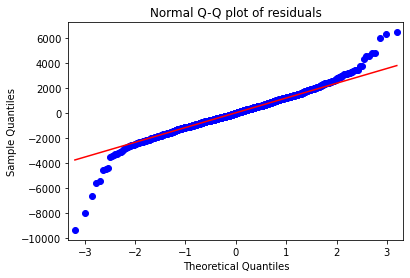

In [11]:
QQplot = sm.qqplot(model_mlr.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

###  Residual Plot for Homoscedasticity

In [12]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

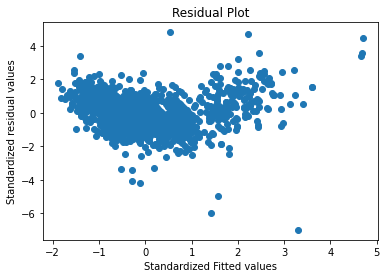

In [13]:
plt.scatter(get_standardized_values(model_mlr.fittedvalues),
            get_standardized_values(model_mlr.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

###   Residual vs Regression plot 

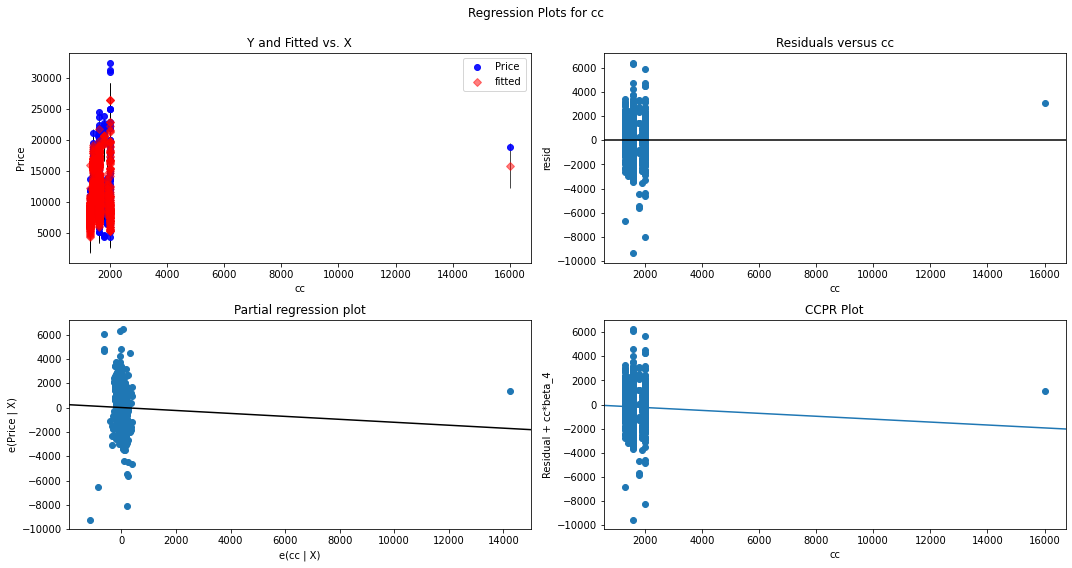

In [14]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_mlr, "cc", fig=fig)
plt.show()

##  Model Diagnostic Technique

###  Cook's distance 

In [15]:
model_influence = model_mlr.get_influence()
(a, _) = model_influence.cooks_distance

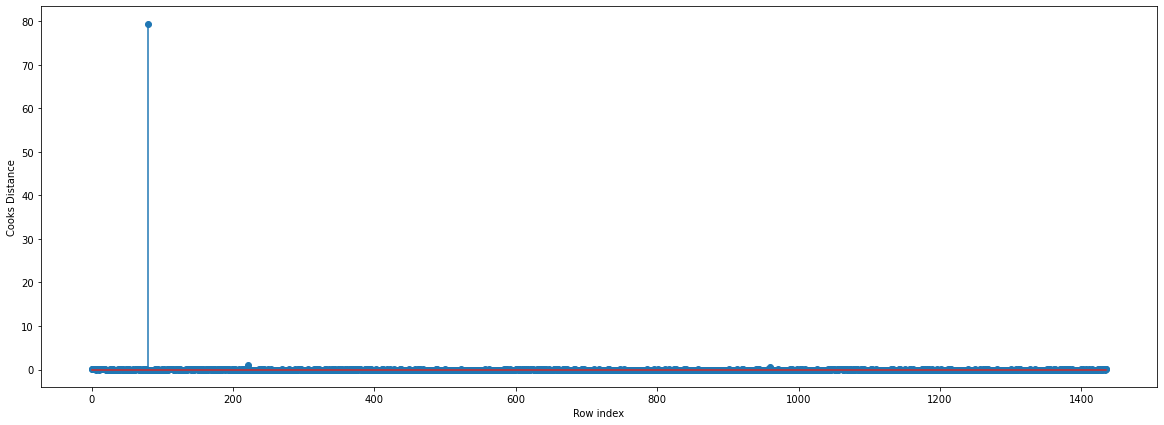

In [16]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(corolla)), np.round(a, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [17]:
(np.argmax(a),np.max(a))

(80, 79.52010624135295)

### cook's distance is greater than 1 so there is an outlier at 80th row 

###   High influence point 

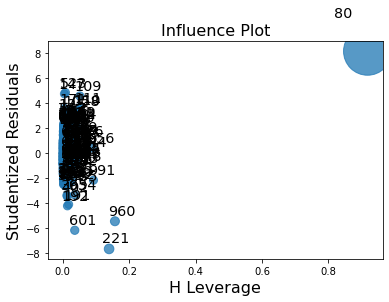

In [18]:
influence_plot(model_mlr)
plt.show()

In [19]:
k = corolla.shape[1]
n = corolla.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

###   From the above figure 80th row is an outlier 

# Improving the model by removing the 80th column 

In [20]:
corolla_new = corolla.drop(corolla.index[80],axis=0).reset_index()
corolla_new

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [21]:
corolla_new = corolla_new.drop(["index"],axis=1)
corolla_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


##   Building a new multiple linear regression model

In [22]:
model_new = slg.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight", data=corolla_new).fit()

In [23]:
rsq_new = model_new.rsquared
rsqadj_new = model_new.rsquared_adj
aic_new = model_new.aic

In [24]:
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:15:15   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###   Again checking for an influencer or an outlier 

In [25]:
model_influence_1 = model_new.get_influence()
(b, _) = model_influence_1.cooks_distance

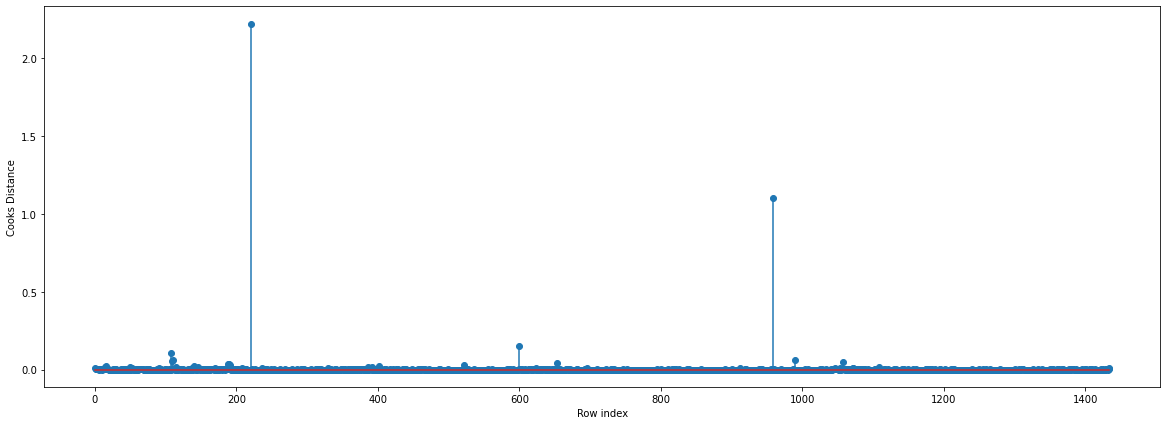

In [26]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(corolla_new)), np.round(b, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
(np.argmax(b),np.max(b))

(220, 2.224461171300801)

##  Improve the model by removing the 220th row 

In [28]:
corolla_new1 = corolla_new.drop([220],axis=0).reset_index()
corolla_new1 = corolla_new1.drop(["index"],axis=1)
corolla_new1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


##  Building a new multiple linear regression model 

In [29]:
model_new1 = slg.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight", data=corolla_new1).fit()

In [30]:
rsq_new1 = model_new1.rsquared
rsqadj_new1 = model_new1.rsquared_adj
aic_new1 = model_new1.aic

In [31]:
model_new1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1280.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:15:18   Log-Likelihood:                -12278.
No. Observations:                1434   AIC:                         2.457e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.025e+04   1395.733     -7.346      0.000    -1.3e+04   -7514.512
Age_08_04      -116.5783      2.508    -46.475      0.000    -121.499    -111.658
KM               -0.0173      0.001    -13.966      0.000      -0.020      -0.015
HP               39.2932      2.816     13.953      0.000      33.769      44.817
cc               -3.2057      0.305    -10.511      0.000      -3.804      -2.607
Doors           -65.3718     38.152     -1.713      0.087    -140.212       9.468
Gears           485.0462    186.602      2.599      0.009     119.001     851.091
Quarterly_Tax     7.9664      1.382      5.762      0.000       5.254      10.678
Weight           25.0494      1.186     21.129      0.000      22.724      27.375
==============================================================================
Omnibus:                      197.976   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.342
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###   Again checking for an outlier using cook's distance 

In [32]:
model_influence_3 = model_new1.get_influence()
(c, _) = model_influence_3.cooks_distance

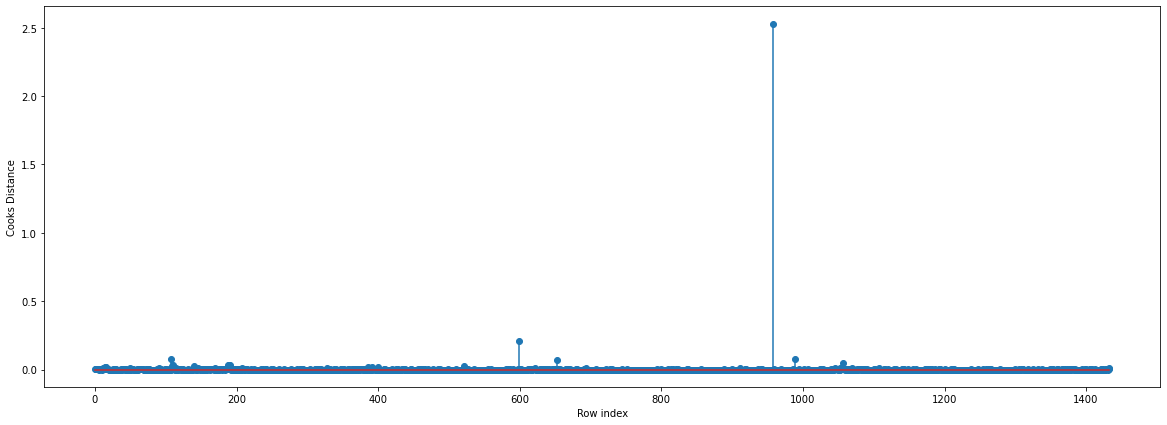

In [33]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(corolla_new1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
(np.argmax(c),np.max(c))

(958, 2.5312566930232845)

##    Again improve the model by removing 958th row 

In [35]:
corolla_new2 = corolla_new1.drop([958],axis=0).reset_index()
corolla_new2 = corolla_new2.drop(["index"],axis=1)
corolla_new2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


## Building a new multiple linear regression model 

In [36]:
model_new2 = slg.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight", data=corolla_new2).fit()

In [37]:
rsq_new2 = model_new2.rsquared
rsqadj_new2 = model_new2.rsquared_adj
aic_new2 = model_new2.aic

In [38]:
model_new2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:15:20   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###     Table showing rsquared, adjacent rsquared and aic values 

In [39]:
table = pd.DataFrame({"Variables":["model_mlr","model_new","model_new1","model_new2"],
                      "Rsquared_values":[rsq_mlr,rsq_new,rsq_new1,rsq_new2],
                      "Rsquared_adjacent":[rsqadj_mlr,rsqadj_new,rsqadj_new1,rsqadj_new2],
                      "AIC_Values":[aic_mlr,aic_new,aic_new1,aic_new2]})
table

,Variables,Rsquared_values,Rsquared_adjacent,AIC_Values
0,model_mlr,0.863763,0.862999,24769.076640
1,model_new,0.869379,0.868646,24687.281024
2,model_new1,0.877845,0.877159,24574.776616
3,model_new2,0.885185,0.884540,24469.715205


###   Looking at the table it is clear that model_new2 is better model than others because resquared value is high and aic value is low  

## Predicting the values for model_new2

In [41]:
new_data=pd.DataFrame({'Age_08_04':15, 'KM':12000, 'HP':90, 'cc':1600,
                       'Doors':4, 'Gears':5, 'Quarterly_Tax':500, 'Weight':1120},index=[1])

In [42]:
new_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1,15,12000,90,1600,4,5,500,1120


####  First prediction 

In [43]:
pred_1 = model_new2.predict(new_data)
pred_1

1    19352.617236
dtype: float64

####  Second prediction 

In [44]:
pred_2 = model_new2.predict(corolla_new2)
pred_2

0       16333.273814
1       15892.326850
2       16310.886081
3       15979.990390
4       15846.536733
            ...     
1428     9115.435074
1429     8499.218117
1430     8644.947302
1431     8758.664462
1432    10641.521002
Length: 1433, dtype: float64